# COM2011 Machine Learning and Data Science
## Course Assessment


This course assessment (CA) represents 40% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website. Students are **not allowed** to use Large Language Models (such as ChatGPT, Bard, etc) to generate code for the CA.


**Submission information:**
1. do not change the name of this notebook, i.e. the notebook file has to be: `ca.ipynb`
2. do not add you name or student code in the notebook or in the file name
3. do not remove or delete or add any cell in this notebook
4. make sure to **remove** and **delete** the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave it in the cell you will fail the associated test
5. do not remove the function `save_history()` at the end of each cell. This function will save your edit operations on the code in the cell and will be used as proof of work, i.e. proof that you have been working on the questions assigned
6. work always in the cells provided when developing your implementation, i.e. do not work on another notebook or with programming environments that do not operate on this notebook.
7. when you are finished debugging **remove** all code that is not part of the function definition, i.e. leave only the clean function implementation in the cell: do not leave debugging `print` statements in the functions, and do not leave function invocations on test inputs
8. make sure that the exeecution of the cell **does not produce any type of output**: the exeecution of the cell should only define the desired functions
9. before the final submission run the function `check_and_prepare_for_submission()` in the last cell of the notebook: this function will create a zip archive called `com2011ca.zip` which contains your notebook and the folder `proof_of_work`.
10. Submit only the file `com2011ca.zip`


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- One or more hidden unit tests are going to evaluate if all desired properties of the required function are met. 
- If the function passes a test all the associated marks are awarded, if it fails 0 marks are awarded.
- If you make a typo error (e.g. misspelling a variable) this will likely cause a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.

Although the test uses a hard fail/pass strategy to assign marks, the presence of several questions allows a fine grading. 

The Checkpoints are not graded by default but might be used to assign additional marks in case the execution of the code obtains the desired results even when some tests might fail.

## Conventions and notation:

Do not assume any library is avaialble other than `matplotlib`, `numpy`, `scipy`, `pandas` and `sklearn`.

Assume Python 3.8.

---

In the rest of the notebook, the term `DataFrame` refers to a Pandas DataFrame object. 

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

In the rest of the notebook, the term `vector` refers to a one dimensional numpy array. 

When we explicitly use the term `column vector` we mean a 2 dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a 2 dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write often need to take in input and return as output such objects, not python lists. Check the specifications for each required function. 

---

**Do not use library functions** to directly solve a question unless explicity instructed to do so. That is, when a required function can be implemented directly by a library function it is intended that the candidate should write their own implementation of the function: for example it the Question asks to implement a function to compute the `accuracy` one cannot just wrap the function `accuracy_score` from `sklearn.metrics` in a custom function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from typing import Tuple
import numpy as np
import scipy as sp
from submission_utils import save_history, check_and_prepare_for_submission
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Question 1


### Function: `create_dataset`
<div style="text-align: right"><b>[20 marks]</b></div>

The `create_dataset` function generates synthetic data for multiple clusters in an arbitrary dimensional space. Cluster centers are sampled from a normal distribution with a mean of zero and a user-defined standard deviation. Each cluster's center, number of points, and spread are defined by the function parameters, making it possible to create a dataset with clusters of varying densities in high-dimensional space.

#### Function Signature:
```python


def create_dataset(num_clusters: int, 
                   num_dimensions: int, 
                   num_points: np.ndarray, 
                   cluster_std_devs: np.ndarray, 
                   center_std_dev: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates synthetic data for multiple clusters with random centers in arbitrary dimensional space.

    Parameters:
    - num_clusters (int): Number of clusters to generate.
    - num_dimensions (int): Dimensionality of the space (e.g., 3 for 3D, etc.).
    - num_points (np.ndarray): Array of shape (num_clusters,) specifying the number of points in each cluster.
    - cluster_std_devs (np.ndarray): Array of shape (num_clusters,), specifying the standard deviation for each cluster's spread.
    - center_std_dev (float): Standard deviation for generating cluster centers from a normal distribution with zero mean.

    Returns:
    - data (np.ndarray): A 2D array of shape (total_points, num_dimensions), with points generated in d-dimensional space.
    - labels (np.ndarray): A 1D array of shape (total_points,), containing cluster labels for each point.
    """
```

---


In [108]:
def create_dataset(num_clusters: int, 
                   num_dimensions: int, 
                   num_points: np.ndarray, 
                   cluster_std_devs: np.ndarray, 
                   center_std_dev: float) -> Tuple[np.ndarray, np.ndarray]:
    data = []
    labels = []
    origin = np.zeros((num_dimensions,))
    cluster_centres = np.random.normal(loc=origin, scale=center_std_dev, size=(num_clusters, num_dimensions))
    for i in range(num_clusters):
        cluster_points = np.random.normal(loc=cluster_centres[i], scale=cluster_std_devs[i], size=(num_points[i], num_dimensions))
        for point in cluster_points:
            data.append(point)
            labels.append(i)
    data = np.array(data)
    labels = np.array(labels)
    return (data, labels)

save_history()

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [4]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2

### Implement PCA Using SVD
<div style="text-align: right"><b>[7 marks]</b></div>

Implement a function that performs Principal Component Analysis (PCA) on a dataset by using Singular Value Decomposition (SVD). The function should first center the data matrix by subtracting the mean from each feature, then apply SVD to obtain the principal components. The function should return the data projected onto the specified number of principal components.

#### Function Signature:
```python
import numpy as np

def pca_with_svd(data: np.ndarray, n_components: int) -> np.ndarray:
    """
    Performs PCA on the given data using Singular Value Decomposition (SVD).
    First, it centers the data matrix, then applies SVD to extract the principal components.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the input data matrix.
    - n_components (int): The number of principal components to retain.

    Returns:
    - transformed_data (np.ndarray): A 2D array of shape (n_samples, n_components), 
                                     the data projected onto the top principal components.
    """
```

In [ ]:
def pca_with_svd(data: np.ndarray, n_components: int) -> np.ndarray:
    centred_data = data - np.mean(data, axis=0)
    u, s, vh = np.linalg.svd(centred_data)
    transformed_data = centred_data.dot(vh.T[:, :n_components])
    return transformed_data

save_history()

In [6]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3


### Implement `plot_dataset`
<div style="text-align: right"><b>[3 marks]</b></div>

The `plot_dataset` function visualizes the dataset generated by `create_dataset` by projecting high-dimensional data onto a 2D plane using Principal Component Analysis (PCA) implemented in `pca_with_svd`. This projection enables visualization of clusters in an interpretable 2D space, regardless of the original dimensionality of the data.

#### Function Signature:
```python
def plot_dataset(data: np.ndarray, labels: np.ndarray) -> None:
    """
    Projects high-dimensional data to 2D using PCA and plots the dataset with color-coding for each cluster.

    Parameters:
    - data (np.ndarray): A 2D array of shape (total_points, num_dimensions), containing points in d-dimensional space.
    - labels (np.ndarray): A 1D array of shape (total_points,), containing cluster labels for each point.

    Returns:
    - None
    """
```

In [109]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_dataset(data: np.ndarray, labels: np.ndarray) -> None:
    if (data.ndim == 1):
        return
    data_2d = PCA(n_components=2).fit_transform(data)
    plt.scatter(*data_2d.T, c=labels, alpha=0.5)
    plt.axis('equal')
    plt.xlabel('First PCA component')
    plt.ylabel('Second PCA component')
    plt.grid()
    plt.show()
    return

save_history()

In [8]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4

### Implement a Function to Impute Missing Values Using Low-Rank SVD
<div style="text-align: right"><b>[20 marks]</b></div>

Implement a function `impute_missing_values` that takes a data matrix (as a NumPy array) and a rank parameter as inputs. This function should replace all `NaN` values in the data matrix with values approximated using a low-rank SVD technique. Here’s how you should proceed:

1. **Replace NaN with Zeros**:  
   Start by replacing all `NaN` values in the data matrix with zeros. This will allow the matrix to be processed by the SVD algorithm, which does not handle missing values.

2. **Compute Low-Rank SVD**:  
   Apply Singular Value Decomposition (SVD) to the modified matrix. Use the specified `rank` parameter to reconstruct an approximation of the matrix that only retains the top `rank` singular values and their associated singular vectors.

3. **Replace Only Original NaN Entries**:  
   Use the low-rank SVD approximation to fill in only the entries that were originally `NaN` in the data matrix. This will replace the missing values with approximations derived from the low-rank reconstruction, while preserving other entries.

---

### Function Signature

```python
import numpy as np
from typing import Tuple

def impute_missing_values(data: np.ndarray, rank: int) -> np.ndarray:
    """
    Imputes missing values in a data matrix using low-rank SVD approximation.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features) containing the input data matrix, 
                         with NaN values representing missing entries.
    - rank (int): The rank for the low-rank SVD approximation.

    Returns:
    - imputed_data (np.ndarray): A 2D array of the same shape as `data`, with NaN values replaced by approximations.
    """
```

---

### Expected Output

The function should return `imputed_data`, a 2D NumPy array of the same shape as the input `data`, with all `NaN` values replaced by approximated values based on the low-rank SVD reconstruction.

This approach will effectively use low-rank SVD to fill missing values in a way that approximates the overall structure of the data, leveraging the patterns present in the available entries.




In [110]:
def impute_missing_values(data: np.ndarray, rank: int) -> np.ndarray:
    no_nan_data = np.nan_to_num(data, nan=0)
    u, s, vh = np.linalg.svd(no_nan_data)
    s = np.diag(s)
    num_cols_u = u.shape[1]
    if num_cols_u > rank:
        u_trunc = u[:, :rank]
    else:
        u_trunc = u
    num_cols_vh = vh.shape[1]
    if num_cols_vh > rank:
        vh_trunc = vh[:rank, :]
    else:
        vh_trunc = vh
    num_sinuglar_values = s.shape[0]
    if num_sinuglar_values > rank:
        s_trunc = s[:rank, :rank]
    else:
        s_trunc = s
    trunc_svd_data = np.dot(np.dot(u_trunc, s_trunc), vh_trunc)
    nan_mask = np.isnan(data)
    nan_indices = np.where(nan_mask)
    imputed_data = data.copy()
    for row_ind, col_ind in zip(nan_indices[0], nan_indices[1]):
        impute_value = trunc_svd_data[row_ind, col_ind]
        imputed_data[row_ind, col_ind] = impute_value
    return imputed_data

save_history()

In [10]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

By executing the following code (just copy the code the next cell):

1. **Create a 5-dimensional dataset** with clusters.
2. **Plot the original data** (using PCA for 2D projection).
3. **Introduce 10% missing values** by randomly setting entries to `NaN`.
4. **Use `impute_missing_values`** to fill in missing values with a rank-4 approximation.
5. **Plot the imputed data** to visualize the differences after imputation.

```python

# Step 1: Create a 5-dimensional dataset with 3 clusters
num_clusters = 3
num_dimensions = 5
num_points = np.array([100, 100, 100])
cluster_std_devs = np.array([1.0, 1.0, 1.0])
center_std_dev = 3.0

data, labels = create_dataset(num_clusters, num_dimensions, num_points, cluster_std_devs, center_std_dev)

# Step 2: Plot the original data (2D projection using PCA)
print("Original Data (2D projection)")
plot_dataset(data, labels)

# Step 3: Introduce 10% missing values
nan_data = data.copy()
num_elements = nan_data.size
num_nan = int(0.1 * num_elements)  # 10% of the data

# Randomly choose 10% of indices to set as NaN
nan_indices = np.random.choice(num_elements, num_nan, replace=False)
nan_data.ravel()[nan_indices] = np.nan

# Step 4: Impute missing values using rank-4 SVD approximation
imputed_data = impute_missing_values(nan_data, rank=4)

# Step 5: Plot the imputed data (2D projection using PCA)
print("Imputed Data (2D projection)")
plot_dataset(imputed_data, labels)
```

you should obtain an output similar to:

<img src="plot_a.png" width=60%>




Original Data (2D projection)


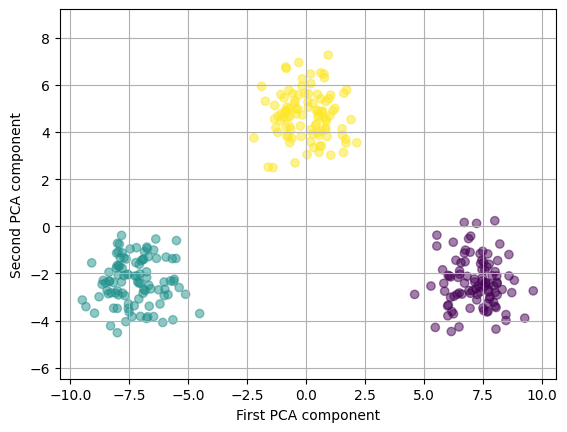

Imputed Data (2D projection)


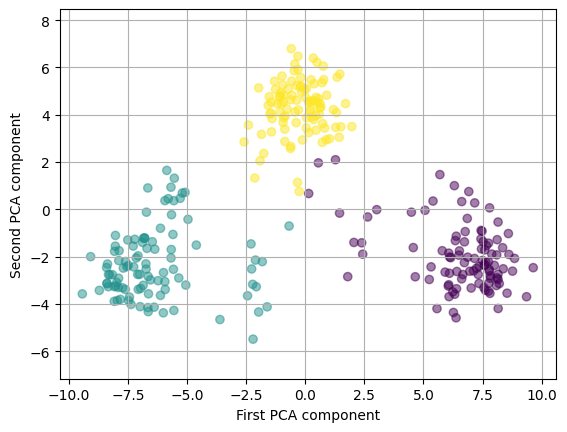

In [111]:
# Step 1: Create a 5-dimensional dataset with 3 clusters
num_clusters = 3
num_dimensions = 5
num_points = np.array([100, 100, 100])
cluster_std_devs = np.array([1.0, 1.0, 1.0])
center_std_dev = 3.0

data, labels = create_dataset(num_clusters, num_dimensions, num_points, cluster_std_devs, center_std_dev)

# Step 2: Plot the original data (2D projection using PCA)
print("Original Data (2D projection)")
plot_dataset(data, labels)

# Step 3: Introduce 10% missing values
nan_data = data.copy()
num_elements = nan_data.size
num_nan = int(0.1 * num_elements)  # 10% of the data

# Randomly choose 10% of indices to set as NaN
nan_indices = np.random.choice(num_elements, num_nan, replace=False)
nan_data.ravel()[nan_indices] = np.nan

# Step 4: Impute missing values using rank-4 SVD approximation
imputed_data = impute_missing_values(nan_data, rank=4)

# Step 5: Plot the imputed data (2D projection using PCA)
print("Imputed Data (2D projection)")
plot_dataset(imputed_data, labels)

## Question 5

## Implement a basic version of the ISOMAP algorithm

### Summary of the ISOMAP Workflow

1. **Construct k-NN Graph**: Create a graph that connects each point to its k nearest neighbors and stores edge weights as distances.
2. **Compute Geodesic Distances**: Calculate the shortest paths between all pairs of points in the k-NN graph to estimate the geodesic distances.
3. **Apply MDS**: Use MDS on the geodesic distance matrix to reduce the dataset to a lower-dimensional space, preserving the manifold structure.

---

### Sub-problem 1: Construct a k-Nearest Neighbor Graph
<div style="text-align: right"><b>[6 marks]</b></div>

The first step in implementing ISOMAP is to create a k-nearest neighbor (k-NN) graph from the dataset. For each point in the dataset, find its `k` nearest neighbors and connect them with edges. Store the distances between these neighbors as edge weights in an adjacency matrix. The resulting k-NN graph will approximate the local relationships in the data, which will be used to estimate the geodesic distances in the next step. 

**Note**: For this sub-problem, you are *not required to implement your own version of k-nearest neighbor*. You may use the NearestNeighbors implementation provided by scikit-learn, which can be found here: [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

#### Function Signature
```python
def construct_knn_graph(data: np.ndarray, k: int) -> np.ndarray:
    """
    Constructs a k-nearest neighbor (k-NN) graph from a dataset.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - k (int): The number of nearest neighbors to connect for each point.

    Returns:
    - knn_graph (np.ndarray): A 2D array of shape (n_samples, n_samples), where knn_graph[i, j] 
                              contains the distance between points i and j if they are neighbors,
                              or 0 otherwise.
    """
```

---

### Sub-problem 2: Compute the Shortest Path Distances
<div style="text-align: right"><b>[6 marks]</b></div>

In this step, use the k-NN graph from the previous step to calculate the shortest path distances between all pairs of points. These shortest path distances approximate the geodesic distances, which measure the true distance along the manifold. You can use the `dijkstra` function from `scipy.sparse.csgraph` to compute the shortest paths in the k-NN graph.

**Note**: For this sub-problem, you are *not required to implement your own version of shortest path distances*. You may use the dijkstra implementation provided by scipy, which can be found here: [dijkstra](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.dijkstra.html)


#### Function Signature
```python
def compute_geodesic_distances(knn_graph: np.ndarray) -> np.ndarray:
    """
    Computes the shortest path distances (geodesic distances) between all pairs of points 
    in the k-nearest neighbor graph using the Floyd-Warshall or Dijkstra's algorithm.

    Parameters:
    - knn_graph (np.ndarray): A 2D array of shape (n_samples, n_samples), representing the k-NN graph 
                              where knn_graph[i, j] contains the distance between points i and j if they 
                              are neighbors, or 0 otherwise.

    Returns:
    - geodesic_distances (np.ndarray): A 2D array of shape (n_samples, n_samples) containing 
                                       the shortest path (geodesic) distance between all pairs of points.
    """
```

---


### Sub-problem 3: Apply Multidimensional Scaling (MDS)
<div style="text-align: right"><b>[6 marks]</b></div>

Once we have the geodesic distance matrix from Sub-problem 2, the next step is to apply Multidimensional Scaling (MDS) to reduce the data to a lower-dimensional space. MDS will attempt to preserve the pairwise distances in the reduced space, closely matching them to the original geodesic distances. This projection effectively retains the manifold’s structure, providing a meaningful lower-dimensional embedding.

**Note**: For this sub-problem, you are *not required to implement your own version of MDS*. You may use the MDS implementation provided by scikit-learn, which can be found here: [sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). 

#### Function Signature
```python
def apply_mds(geodesic_distances: np.ndarray, n_components: int) -> np.ndarray:
    """
    Applies Multidimensional Scaling (MDS) to the geodesic distance matrix to reduce the data 
    to a lower-dimensional space.

    Parameters:
    - geodesic_distances (np.ndarray): A 2D array of shape (n_samples, n_samples), containing 
                                       the geodesic distances between all pairs of points.
    - n_components (int): The number of dimensions to project the data onto (e.g., 2 for 2D).

    Returns:
    - reduced_data (np.ndarray): A 2D array of shape (n_samples, n_components), representing 
                                 the data in the reduced-dimensional space.
    """
```

---

### Sub-problem 4: ISOMAP
<div style="text-align: right"><b>[6 marks]</b></div>

The function signature for the main `ISOMAP` function should take in a dataset, parameters for the algorithm, and return the data projected onto a lower-dimensional space. It will use the helper functions to construct the k-nearest neighbor graph, compute geodesic distances, and apply Multidimensional Scaling (MDS) to the geodesic distance matrix.

```python
def isomap(data: np.ndarray, n_components: int, k: int) -> np.ndarray:
    """
    Applies the ISOMAP algorithm to reduce high-dimensional data to a lower-dimensional space,
    preserving the manifold structure of the dataset.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - n_components (int): The number of dimensions to project the data onto (e.g., 2 for 2D).
    - k (int): The number of nearest neighbors to connect for each point in the k-NN graph.

    Returns:
    - reduced_data (np.ndarray): A 2D array of shape (n_samples, n_components), representing 
                                 the dataset in the reduced-dimensional space.
    """
```


In [112]:
from sklearn.neighbors import NearestNeighbors

def construct_knn_graph(data: np.ndarray, k: int) -> np.ndarray:
    knn = NearestNeighbors(n_neighbors=k + 1)
    knn.fit(data)
    distances, indices = knn.kneighbors(data)
    num_samples = data.shape[0]
    knn_graph = np.zeros((num_samples, num_samples))
    for i, (distances_vector, indices_vector) in enumerate(zip(distances, indices)):
        for distance, j in zip(distances_vector, indices_vector):
            knn_graph[i, j] = distance
            knn_graph[j, i] = distance
    return knn_graph

save_history()

In [113]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

def compute_geodesic_distances(knn_graph: np.ndarray) -> np.ndarray:
    num_samples = knn_graph.shape[0]
    geodesic_distances = np.zeros((num_samples, num_samples))
    knn_cs_graph = csr_matrix(knn_graph)
    for i in range(num_samples):
        distances_vector = dijkstra(csgraph=knn_cs_graph, directed=False, indices=i)
        geodesic_distances[i] = distances_vector
    return geodesic_distances

save_history()

In [114]:
from sklearn.manifold import MDS

def apply_mds(geodesic_distances: np.ndarray, n_components: int) -> np.ndarray:
    embedding = MDS(n_components=n_components, dissimilarity='precomputed')
    geodesic_distances[geodesic_distances == np.inf] = 1e9
    reduced_data = embedding.fit_transform(geodesic_distances)
    return reduced_data

save_history()

In [115]:
def isomap(data: np.ndarray, n_components: int, k: int) -> np.ndarray:
    knn_graph = construct_knn_graph(data, k)
    geodesic_distances = compute_geodesic_distances(knn_graph)
    reduced_data = apply_mds(geodesic_distances, n_components)
    return reduced_data

save_history()

In [16]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [17]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [19]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 6

### Implement K-Means Clustering Algorithm

Implement the K-Means algorithm from scratch, where you iteratively assign data points to clusters based on proximity to centroids and update the centroids. This exercise will provide a solid understanding of how K-Means works internally.


1. **Initialize Centroids**:  
   Randomly initialize `k` centroids by selecting `k` data points as the starting cluster centers.

2. **Assign Points to Nearest Centroid**:  
   For each point in the dataset, assign it to the nearest centroid based on Euclidean distance.

3. **Update Centroids**:  
   For each cluster, calculate the new centroid as the mean of all points assigned to that cluster.

4. **Iterate**:  
   Repeat steps 2 and 3 until convergence (i.e., the centroids no longer change significantly or a maximum number of iterations is reached).



---

### Step 1: Initialize Centroids
<div style="text-align: right"><b>[3 marks]</b></div>

This function selects `k` initial centroids by randomly choosing `k` unique data points from the dataset. This helps start the K-Means algorithm with an initial set of cluster centers. Random initialization can impact clustering results, so this step can be run multiple times if necessary for better stability.

#### Function Signature

```python
def initialize_centroids(data: np.ndarray, k: int) -> np.ndarray:
    """
    Randomly selects `k` unique data points from the dataset as initial centroids.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - k (int): The number of clusters (and thus, the number of centroids) to initialize.

    Returns:
    - centroids (np.ndarray): A 2D array of shape (k, n_features), representing the initial centroids.
    """
```

---

### Step 2: Assign Points to Nearest Centroid
<div style="text-align: right"><b>[3 marks]</b></div>

This function assigns each data point to the nearest centroid based on Euclidean distance. For each point, it calculates the distance to each centroid and assigns the point to the cluster with the nearest centroid. This step defines the clustering structure for each iteration.

#### Function Signature

```python
def assign_clusters(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assigns each data point to the nearest centroid based on Euclidean distance.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - centroids (np.ndarray): A 2D array of shape (k, n_features), representing the current centroids.

    Returns:
    - labels (np.ndarray): A 1D array of shape (n_samples,), where each entry is the index of the nearest centroid for each data point.
    """
```

---

### Step 3: Update Centroids
<div style="text-align: right"><b>[3 marks]</b></div>

This function updates the centroid of each cluster by calculating the mean of all data points assigned to that cluster. For each centroid, it finds the mean position of all points within its cluster and updates the centroid’s position accordingly. This step moves the centroids closer to the “center” of their assigned points, reducing intra-cluster distances.

#### Function Signature

```python
def update_centroids(data: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    """
    Updates the centroid of each cluster by calculating the mean of points assigned to each cluster.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - labels (np.ndarray): A 1D array of shape (n_samples,), where each entry is the index of the assigned cluster for each point.
    - k (int): The number of clusters.

    Returns:
    - new_centroids (np.ndarray): A 2D array of shape (k, n_features), representing the updated centroids.
    """
```

### Step 4: K-Means algorithm
<div style="text-align: right"><b>[3 marks]</b></div>
Implement the K-Means algorithm using the previous functions.

The parameter `tol` in the K-Means algorithm represents the tolerance for convergence, defining the maximum allowable movement of centroids between iterations for the algorithm to be considered as having converged. When the maximum shift of any centroid is less than `tol`, the algorithm stops, as further adjustments are unlikely to significantly improve clustering accuracy.

The parameter `max_iter` in the K-Means algorithm specifies the maximum number of iterations the algorithm will run before stopping, regardless of whether convergence has been achieved. It acts as a safeguard to prevent the algorithm from running indefinitely, especially in cases where the centroids oscillate or convergence is slow. If the algorithm reaches `max_iter` iterations without meeting the convergence criteria (based on `tol`), it stops, returning the current centroids and cluster assignments. This ensures computational efficiency by limiting the algorithm’s runtime.

#### Function Signature

```python
import numpy as np

def kmeans(data: np.ndarray, k: int, max_iter: int = 100, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray]:
    """
    Implements the K-Means clustering algorithm from scratch.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features) representing the dataset.
    - k (int): The number of clusters to form.
    - max_iter (int): The maximum number of iterations for convergence.
    - tol (float): The tolerance for convergence based on centroid movement.

    Returns:
    - centroids (np.ndarray): A 2D array of shape (k, n_features) representing the final centroid positions.
    - labels (np.ndarray): A 1D array of shape (n_samples,) where each entry is the assigned cluster label for each point.
    """
```



In [116]:
def initialize_centroids(data: np.ndarray, k: int) -> np.ndarray:
    centroids = []
    num_samples = data.shape[0]
    for _ in range(k):
        rand_ind = np.random.choice(num_samples)
        rand_data_point = data[rand_ind]
        centroids.append(rand_data_point)
    centroids = np.array(centroids)
    return centroids

save_history()

In [21]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [117]:
def assign_clusters(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    num_clusters = centroids.shape[0]
    labels = []
    for data_point in data:
        best_centroid_ind = 0
        best_euclidean_distance = 1e9
        for i in range (num_clusters):
            centroid = centroids[i]
            euclidean_distance = sum((centroid_val - data_point_val) ** 2 for centroid_val, data_point_val in zip(centroid, data_point)) ** 0.5
            if (euclidean_distance < best_euclidean_distance):
                best_euclidean_distance = euclidean_distance
                best_centroid_ind = i
        labels.append(best_centroid_ind)
    labels = np.array(labels)
    return labels

save_history()

In [23]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [118]:
def update_centroids(data: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    clusters = {}
    for i in range(k):
        clusters[f"{i}"] = []
    for i, data_point in enumerate(data):
        clusters[f"{labels[i]}"].append(data_point)
    new_centroids = []
    for i in range(k):
        cluster = np.array(clusters[f"{i}"])
        new_centroids.append(np.array([np.mean(feature) for feature in cluster.T]))

    new_centroids = np.array(new_centroids)
    return new_centroids

save_history()

In [25]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [119]:
def kmeans(data: np.ndarray, k: int, max_iter: int = 100, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray]:
    centroids = initialize_centroids(data, k)
    labels = assign_clusters(data, centroids)
    max_movement = 1e9
    while (tol < max_movement and max_iter > 0):
        old_centroids = centroids.copy()
        centroids = update_centroids(data, labels, k)
        movements = []
        for i in range(centroids.shape[0]):
            old_centroid = old_centroids[i]
            centroid = centroids[i]
            movements.append(sum((old_val - val) ** 2 for old_val, val in zip(old_centroid, centroid)) ** 0.5)
        max_movement = max(movements)
        labels = assign_clusters(data, centroids)
        max_iter -= 1
    return (centroids, labels)

save_history()

In [27]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 7


### Implement the Silhouette Score 
The silhouette score is a measure of how well data points are clustered. For each data point $ i $, the silhouette score $ s(i) $ is calculated based on two main values: the **within-cluster distance** $ a(i) $ and the **nearest-cluster distance** $ b(i) $. The silhouette score helps evaluate the quality of clustering results, with higher scores indicating better-defined clusters.


### Summary of Functions

1. **`within_cluster_distances`**: Computes $ a(i) $ for each point.
2. **`nearest_cluster_distances`**: Computes $ b(i) $ for each point.
3. **`silhouette_score`**: Uses $ a(i) $ and $ b(i) $ to compute the silhouette score $ s(i) $ for each point and the mean silhouette score for the dataset.



---


#### Sub-problem 1: Compute the Within-Cluster Distance $a(i)$
<div style="text-align: right"><b>[5 marks]</b></div>

For each data point $ i $, calculate $ a(i) $, the **within-cluster distance**. This is the average distance from $ i $ to all other points within the same cluster. It provides a measure of how similar each point is to other points in its own cluster.

#### Function Signature
```python

def within_cluster_distances(data: np.ndarray, labels: np.ndarray) -> np.ndarray:
    """
    Computes the within-cluster distance a(i) for each data point, representing the average distance
    from each point to all other points in the same cluster.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - labels (np.ndarray): A 1D array of shape (n_samples,), where each entry indicates the cluster label for each point.

    Returns:
    - within_distances (np.ndarray): A 1D array of shape (n_samples,), where each entry is the within-cluster distance a(i) for each point.
    """
```

---

#### Sub-problem 2: Compute the Nearest-Cluster Distance \( b(i) \)
<div style="text-align: right"><b>[5 marks]</b></div>

For each data point $ i $, calculate $ b(i) $, the **nearest-cluster distance**. This is defined as the minimum average distance from $ i $ to all points in any other cluster. The nearest-cluster distance indicates how close each point is to the points in the neighboring cluster.

#### Function Signature
```python
def nearest_cluster_distances(data: np.ndarray, labels: np.ndarray) -> np.ndarray:
    """
    Computes the nearest-cluster distance b(i) for each data point, which is the minimum average distance
    from each point to all points in any other cluster.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - labels (np.ndarray): A 1D array of shape (n_samples,), where each entry indicates the cluster label for each point.

    Returns:
    - nearest_distances (np.ndarray): A 1D array of shape (n_samples,), where each entry is the nearest-cluster distance b(i) for each point.
    """

```

---

#### Sub-problem 3: Compute the Silhouette Score
<div style="text-align: right"><b>[4 marks]</b></div>

Using $ a(i) $ and $ b(i) $, calculate the silhouette score $ s(i) $ for each point. The silhouette score $ s(i) $ is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

This score ranges from -1 to 1, where a high positive value indicates that the point is well-matched to its own cluster, and a value near zero or negative suggests poor clustering. The function should return both individual scores $ s(i) $ and the average silhouette score for the entire dataset, which provides an overall quality measure for the clustering.

#### Function Signature
```python
def silhouette_score(data: np.ndarray, labels: np.ndarray) -> Tuple[np.ndarray, float]:
    """
    Calculates the silhouette score s(i) for each data point and the mean silhouette score for the entire dataset.

    Parameters:
    - data (np.ndarray): A 2D array of shape (n_samples, n_features), representing the dataset.
    - labels (np.ndarray): A 1D array of shape (n_samples,), where each entry indicates the cluster label for each point.

    Returns:
    - scores (np.ndarray): A 1D array of shape (n_samples,), where each entry is the silhouette score s(i) for each point.
    - mean_score (float): The mean silhouette score for the entire dataset.
    """
```



In [120]:
def within_cluster_distances(data: np.ndarray, labels: np.ndarray) -> np.ndarray:
    num_samples = data.shape[0]
    within_distances = np.zeros((num_samples,))
    for result_ind, (data_point, cluster_ind) in enumerate(zip(data, labels)):
        cluster_points_inds = np.argwhere(labels == cluster_ind)
        cluster_points = data[cluster_points_inds]
        if len(cluster_points) > 1:
            a_of_i_frac = 1 / (len(cluster_points) - 1)
            a_of_i_sum = 0
            for other_data_point in cluster_points:
                other_data_point.shape = (other_data_point.shape[1],)
                if not np.array_equal(data_point, other_data_point):
                    a_of_i_sum += (sum((i - j) ** 2 for i, j in zip(data_point, other_data_point))) ** 0.5
            a_of_i = a_of_i_frac * a_of_i_sum
            within_distances[result_ind] = a_of_i
        else:
            within_distances[result_ind] = 0
    return within_distances

save_history()

In [29]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [121]:
def nearest_cluster_distances(data: np.ndarray, labels: np.ndarray) -> np.ndarray:
    num_samples = data.shape[0]
    nearest_distances = np.zeros((num_samples,))
    for result_ind, (data_point, cluster_ind) in enumerate(zip(data, labels)):
        nearest_distance = 1e9
        num_clusters = max(labels)
        for other_cluster_ind in [ind for ind in range(num_clusters) if ind != cluster_ind]:
            other_cluster_points_inds = np.argwhere(labels == other_cluster_ind)
            other_cluster_points = data[other_cluster_points_inds]
            b_of_i_frac = 1 / len(other_cluster_points_inds)
            b_of_i_sum = 0
            for other_data_point in other_cluster_points:
                other_data_point.shape = (other_data_point.shape[1],)
                b_of_i_sum += (sum((i - j) ** 2 for i, j in zip(data_point, other_data_point))) ** 0.5
            b_of_i = b_of_i_frac * b_of_i_sum
            if b_of_i < nearest_distance:
                nearest_distance = b_of_i
        nearest_distances[result_ind] = nearest_distance
    return nearest_distances

save_history()

In [31]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [122]:
def silhouette_score(data: np.ndarray, labels: np.ndarray) -> Tuple[np.ndarray, float]:
    num_samples = len(labels)
    scores = np.zeros(num_samples)
    a_of_is = within_cluster_distances(data, labels)
    b_of_is = nearest_cluster_distances(data, labels)
    for i in range(num_samples):
        a_of_i = a_of_is[i]
        b_of_i = b_of_is[i]
        score = (b_of_i - a_of_i) / max(a_of_i, b_of_i)
        scores[i] = score
    mean_score = np.mean(scores)
    return scores, mean_score

save_history()

In [33]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

By executing the following code (just copy the code the next cell):
```python
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 5-dimensional data with overlapping clusters
# We create 3 clusters with significant overlap
np.random.seed(42)
num_clusters = 3
num_dimensions = 5
num_points = np.array([100, 100, 100])
cluster_std_devs = np.array([1.5, 2.5, 2.5])  # High std dev for overlap
center_std_dev = 5.0  # Spread out the cluster centers more

# Generate the dataset
data, labels = create_dataset(num_clusters, num_dimensions, num_points, cluster_std_devs, center_std_dev)

# Step 2: Introduce missing values into the dataset (10% of the data)
nan_data = data.copy()
num_elements = nan_data.size
num_nan = int(0.1 * num_elements)  # 10% of the data
nan_indices = np.random.choice(num_elements, num_nan, replace=False)
nan_data.ravel()[nan_indices] = np.nan

# Step 3: Impute missing values using low-rank SVD with rank 4
imputed_data = impute_missing_values(nan_data, rank=4)

# Step 4: Apply ISOMAP to reduce to 2D for visualization
n_components = 2
data_2d = isomap(imputed_data, n_components=n_components, k=5)

# Step 5: Apply kmeans clustering and calculate silhouette scores for each cluster count
n_clusters_range = range(2, 9)
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Apply kmeans clustering to the reduced data
    centroids, cluster_labels = kmeans(data_2d, k=n_clusters, max_iter=100, tol=1e-4)
    
    # Calculate the silhouette score for the current number of clusters
    _, mean_silhouette_score = silhouette_score(data_2d, cluster_labels)
    silhouette_scores.append(mean_silhouette_score)

# Step 6: Identify the best number of clusters based on silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

# Print the results
print(f"Best number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score:.3f}")

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Silhouette Score")
plt.show()
```
you should obtain an output similar to:

<img src="plot_b.png" width=60%>

Best number of clusters: 4
Best silhouette score: 0.734


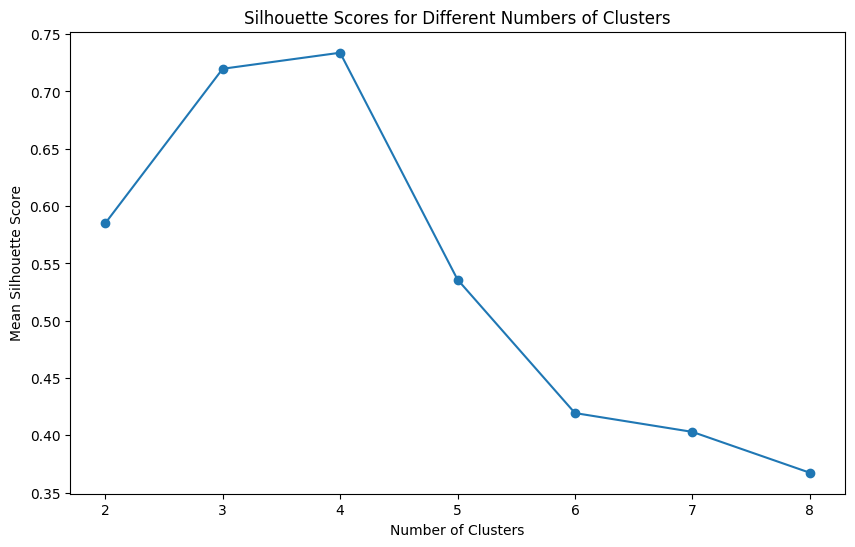

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 5-dimensional data with overlapping clusters
# We create 3 clusters with significant overlap
np.random.seed(42)
num_clusters = 3
num_dimensions = 5
num_points = np.array([100, 100, 100])
cluster_std_devs = np.array([1.5, 2.5, 2.5])  # High std dev for overlap
center_std_dev = 5.0  # Spread out the cluster centers more

# Generate the dataset
data, labels = create_dataset(num_clusters, num_dimensions, num_points, cluster_std_devs, center_std_dev)

# Step 2: Introduce missing values into the dataset (10% of the data)
nan_data = data.copy()
num_elements = nan_data.size
num_nan = int(0.1 * num_elements)  # 10% of the data
nan_indices = np.random.choice(num_elements, num_nan, replace=False)
nan_data.ravel()[nan_indices] = np.nan

# Step 3: Impute missing values using low-rank SVD with rank 4
imputed_data = impute_missing_values(nan_data, rank=4)

# Step 4: Apply ISOMAP to reduce to 2D for visualization
n_components = 2
data_2d = isomap(imputed_data, n_components=n_components, k=5)

# Step 5: Apply kmeans clustering and calculate silhouette scores for each cluster count
n_clusters_range = range(2, 9)
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Apply kmeans clustering to the reduced data
    centroids, cluster_labels = kmeans(data_2d, k=n_clusters, max_iter=100, tol=1e-4)
    
    # Calculate the silhouette score for the current number of clusters
    _, mean_silhouette_score = silhouette_score(data_2d, cluster_labels)
    silhouette_scores.append(mean_silhouette_score)

# Step 6: Identify the best number of clusters based on silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

# Print the results
print(f"Best number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score:.3f}")

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Silhouette Score")
plt.show()


In [35]:
# Do not consider the next cell.
# You do not have to do anything for the next cell.

In [36]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [125]:
check_and_prepare_for_submission()

The notebook and the history are ready for sumbission.
The following archive has been created in the parent directory with name: com2011ca.zip
